In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
import tensorflow as tf

print("Libraries imported successfully.")


Libraries imported successfully.


In [2]:
import pandas as pd

path = "UCI HAR Dataset/"

# Load train and test data
X_train = pd.read_csv(path + "train/X_train.txt", sep="\s+", header=None)
y_train = pd.read_csv(path + "train/y_train.txt", sep="\s+", header=None)

X_test = pd.read_csv(path + "test/X_test.txt", sep="\s+", header=None)
y_test = pd.read_csv(path + "test/y_test.txt", sep="\s+", header=None)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (7352, 561)
y_train: (7352, 1)
X_test: (2947, 561)
y_test: (2947, 1)


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Convert labels to 1D arrays (from dataframe → numpy)
y_train = y_train[0].values - 1
y_test = y_test[0].values - 1

# Scale the sensor data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM → (samples, timesteps=1, features)
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm  = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

print("Preprocessing complete!")
print("X_train_lstm:", X_train_lstm.shape)
print("X_test_lstm:", X_test_lstm.shape)


Preprocessing complete!
X_train_lstm: (7352, 1, 561)
X_test_lstm: (2947, 1, 561)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    LSTM(128, input_shape=(1, 561)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Early stopping to prevent overfitting
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_lstm, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[earlystop],
    verbose=1
)

# Evaluate model
loss, acc = model.evaluate(X_test_lstm, y_test, verbose=1)
print(f"Test Accuracy: {acc:.4f}")
print(f"Test Loss: {loss:.4f}")


C:\Users\cool\har_project\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │         353,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,926 (1.38 MB)

 Trainable params: 361,926 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8359 - loss: 0.4376 - val_accuracy: 0.9089 - val_loss: 0.2330
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9515 - loss: 0.1325 - val_accuracy: 0.9470 - val_loss: 0.1249
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9685 - loss: 0.0897 - val_accuracy: 0.9470 - val_loss: 0.1505
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9735 - loss: 0.0741 - val_accuracy: 0.9436 - val_loss: 0.1854
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9774 - loss: 0.0643 - val_accuracy: 0.9463 - val_loss: 0.1774
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9765 - loss: 0.0600 - val_accuracy: 0.9449 - val_loss: 0.1584
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9793 - loss: 0.0565 - val_accuracy: 0.9443 - val_loss: 0.1577
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9304 - loss: 0.1849
Test Accuracy: 0.9304
Te

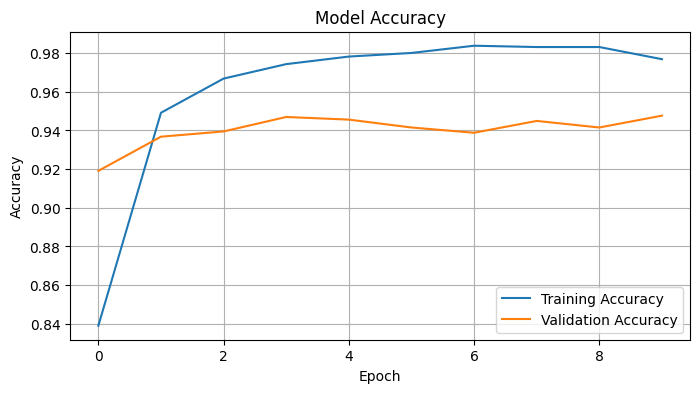

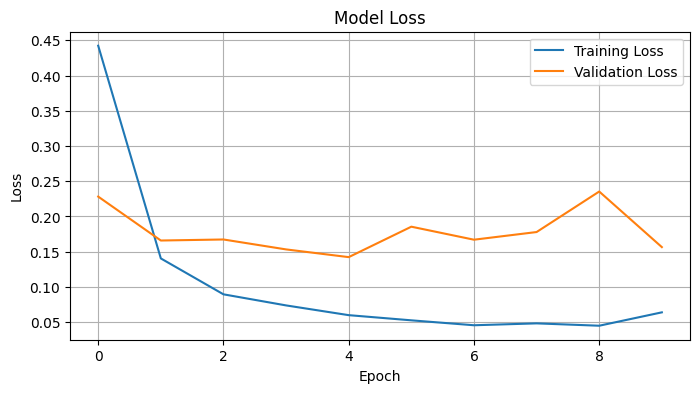

Graphs saved as accuracy_graph.png and loss_graph.png


In [23]:
import matplotlib.pyplot as plt

# === Accuracy Graph ===
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("accuracy_graph.png", dpi=150)
plt.show()

# === Loss Graph ===
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.savefig("loss_graph.png", dpi=150)
plt.show()

print("Graphs saved as accuracy_graph.png and loss_graph.png")


In [6]:
from tensorflow.keras.models import load_model
import joblib

# === Save the model & scaler ===
model.save("har_lstm_model.h5")
joblib.dump(scaler, "scaler.joblib")

print("Model and scaler saved!")

# === Activity labels ===
activities = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

# === Prediction function ===
def predict_activity(sensor_values):
    """
    sensor_values: numpy array of shape (561,) -> one input row
    returns: predicted activity label
    """
    sensor_values = sensor_values.reshape(1, -1)               # reshape for scaler
    sensor_values = scaler.transform(sensor_values)            # scale input
    sensor_values = sensor_values.reshape(1, 1, 561)           # reshape for LSTM
    probabilities = model.predict(sensor_values)               # model prediction
    class_index = probabilities.argmax(axis=1)[0]              # highest prob class
    return activities[class_index], float(probabilities.max()) # label + confidence

print("Prediction function ready!")


Model and scaler saved!
Prediction function ready!


In [25]:
label, confidence = predict_activity(X_test.iloc[0].values)
print("Predicted:", label, "| Confidence:", confidence)
print("Actual:", activities[y_test[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Predicted: STANDING | Confidence: 0.9993560910224915
Actual: STANDING


In [18]:
pd.DataFrame(X_test).head(10).to_csv("sample1.csv", index=False, header=False)


In [16]:
import numpy as np
X_test = np.array(X_test)  # ensure raw NumPy


In [15]:
import pandas as pd
import numpy as np

idx = np.random.choice(X_test.shape[0], 10, replace=False)

df = X_test.iloc[idx]   # <-- iloc selects rows by position
df.to_csv("random_2_samples.csv", index=False, header=False)

print("Exported random_2_samples.csv")


Exported random_2_samples.csv


In [16]:
import pandas as pd
import numpy as np
import os

# ------------------------------------------------------------------
# CONFIGURATION
# ------------------------------------------------------------------
DATA_PATH = "UCI HAR Dataset/" # Ensure this matches your folder name
OUTPUT_DIR = "generated_samples"

ACTIVITIES_MAP = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

def generate_samples():
    # 1. Check if dataset exists
    if not os.path.exists(DATA_PATH):
        print(f"❌ Error: Could not find '{DATA_PATH}'. Please ensure the dataset is extracted.")
        return

    # 2. Create output directory
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)
        print(f"📂 Created output directory: {OUTPUT_DIR}")

    print("⏳ Loading Test Data... (This might take a moment)")
    
    # Load X_test (Features) and y_test (Labels)
    # Note: We use the RAW data. We do NOT scale it here, because 
    # the Streamlit app scaler will handle that.
    try:
        X_test = pd.read_csv(os.path.join(DATA_PATH, "test/X_test.txt"), sep="\s+", header=None)
        y_test = pd.read_csv(os.path.join(DATA_PATH, "test/y_test.txt"), sep="\s+", header=None)
    except FileNotFoundError as e:
        print(f"❌ File not found: {e}")
        return

    print(f"✅ Loaded {len(X_test)} test samples.")

    # ------------------------------------------------------------------
    # GENERATE SINGLE SAMPLES (For "Single Sample" Mode)
    # ------------------------------------------------------------------
    print("\n--- Generating Single Samples ---")
    for label_id, activity_name in ACTIVITIES_MAP.items():
        # Find all indices where label matches the current activity
        indices = y_test[y_test[0] == label_id].index
        
        if len(indices) > 0:
            # Pick the 10th sample of this activity (arbitrary choice to avoid outliers at start)
            idx = indices[10] if len(indices) > 10 else indices[0]
            
            # Extract row
            sample_row = X_test.iloc[[idx]]
            
            # Save to CSV (No header, no index, just the raw numbers)
            filename = f"{OUTPUT_DIR}/sample_{activity_name}.csv"
            sample_row.to_csv(filename, header=False, index=False)
            print(f"📄 Saved: {filename}")

    # ------------------------------------------------------------------
    # GENERATE BATCH FILE (For "Batch Analysis" Mode)
    # ------------------------------------------------------------------
    print("\n--- Generating Batch Simulation File ---")
    # Let's take 20 rows of Walking, then 20 of Upstairs, then 20 of Sitting
    # to simulate a sequence of events.
    
    batch_indices = []
    
    # Sequence: Walking -> Upstairs -> Walking -> Sitting
    seq_ids = [1, 2, 1, 4] 
    
    for seq_id in seq_ids:
        indices = y_test[y_test[0] == seq_id].index[:25] # Take 25 frames of each
        batch_indices.extend(indices)
        
    batch_df = X_test.iloc[batch_indices]
    
    batch_filename = f"{OUTPUT_DIR}/simulation_batch_100frames.csv"
    batch_df.to_csv(batch_filename, header=False, index=False)
    print(f"🎞️  Saved Batch File: {batch_filename} ({len(batch_df)} rows)")
    
    print("\n✅ Done! Upload these files to your Streamlit Dashboard.")

if __name__ == "__main__":
    generate_samples()

📂 Created output directory: generated_samples
⏳ Loading Test Data... (This might take a moment)
✅ Loaded 2947 test samples.

--- Generating Single Samples ---
📄 Saved: generated_samples/sample_WALKING.csv
📄 Saved: generated_samples/sample_WALKING_UPSTAIRS.csv
📄 Saved: generated_samples/sample_WALKING_DOWNSTAIRS.csv
📄 Saved: generated_samples/sample_SITTING.csv
📄 Saved: generated_samples/sample_STANDING.csv
📄 Saved: generated_samples/sample_LAYING.csv

--- Generating Batch Simulation File ---
🎞️  Saved Batch File: generated_samples/simulation_batch_100frames.csv (100 rows)

✅ Done! Upload these files to your Streamlit Dashboard.


In [26]:
import pandas as pd
import numpy as np
import os

# CONFIGURATION
DATA_PATH = "UCI HAR Dataset/"
OUTPUT_FILE = "full_test_set_labeled.csv"

# Map ID to String
ACTIVITIES_MAP = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

def create_labeled_csv():
    if not os.path.exists(DATA_PATH):
        print(f"❌ Error: '{DATA_PATH}' not found.")
        return

    print("⏳ Loading X_test and y_test...")
    
    # 1. Load Features (561 columns)
    X_test = pd.read_csv(os.path.join(DATA_PATH, "test/X_test.txt"), sep="\s+", header=None)
    
    # 2. Load Labels (1 column)
    y_test = pd.read_csv(os.path.join(DATA_PATH, "test/y_test.txt"), sep="\s+", header=None)
    
    # 3. Map numeric labels to text
    # We use a lambda function to look up the dictionary
    y_test_text = y_test[0].map(ACTIVITIES_MAP)
    
    print("🔄 Merging data...")
    
    # 4. Combine: Features first, Label last
    # Result shape: (2947, 562)
    combined_df = pd.concat([X_test, y_test_text], axis=1)
    
    # 5. Save to CSV
    # We use header=False and index=False to keep it clean for the numpy loader
    combined_df.to_csv(OUTPUT_FILE, header=False, index=False)
    
    print(f"✅ Success! Saved '{OUTPUT_FILE}' with shape {combined_df.shape}")
    print("👉 The last column (index 561) contains the Actual Activity Label.")

if __name__ == "__main__":
    create_labeled_csv()

⏳ Loading X_test and y_test...
🔄 Merging data...
✅ Success! Saved 'full_test_set_labeled.csv' with shape (2947, 562)
👉 The last column (index 561) contains the Actual Activity Label.


In [30]:
import pandas as pd
import os

# ==========================================
# CONFIGURATION
# ==========================================
INPUT_FILE = "full_test_set_labeled.csv"   # The large source dataset
OUTPUT_DIR = "random_test_samples"         # Output folder
NUM_FILES = 10                             # Number of batch files to create
ROWS_PER_FILE = 50                         # Number of time steps per file

def generate_randomizer():
    # 1. Check for source file
    if not os.path.exists(INPUT_FILE):
        print(f"❌ Error: '{INPUT_FILE}' not found.")
        print("   Please run 'create_labeled_dataset.py' once to generate the source.")
        return

    # 2. Load dataset
    print(f"⏳ Reading {INPUT_FILE}...")
    try:
        df = pd.read_csv(INPUT_FILE, header=None)
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return

    # 3. Prepare output folder
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    print(f"🎲 Generating {NUM_FILES} fresh random batch...")

    # 4. Loop to generate files
    for i in range(1, NUM_FILES + 1):
        # Sample random rows (replace=False ensures unique rows within the file)
        # We do not set a seed, so every run produces different results
        subset = df.sample(n=ROWS_PER_FILE)
        
        filename = os.path.join(OUTPUT_DIR, f"batch_test_{i}.csv")
        
        # Save without headers/index for the Dashboard to read correctly
        subset.to_csv(filename, header=False, index=False)
        print(f"   📄 Created: {filename}")

    print(f"\n✅ Done! New file is ready in '{OUTPUT_DIR}/'.")

if __name__ == "__main__":
    generate_randomizer()

⏳ Reading full_test_set_labeled.csv...
🎲 Generating 10 fresh random batch...
   📄 Created: random_test_samples\batch_test_1.csv
   📄 Created: random_test_samples\batch_test_2.csv
   📄 Created: random_test_samples\batch_test_3.csv
   📄 Created: random_test_samples\batch_test_4.csv
   📄 Created: random_test_samples\batch_test_5.csv
   📄 Created: random_test_samples\batch_test_6.csv
   📄 Created: random_test_samples\batch_test_7.csv
   📄 Created: random_test_samples\batch_test_8.csv
   📄 Created: random_test_samples\batch_test_9.csv
   📄 Created: random_test_samples\batch_test_10.csv

✅ Done! New file is ready in 'random_test_samples/'.
